<a href="https://colab.research.google.com/github/CallMeIsEthan/TriTueNhanTao/blob/main/BaoCao_THTTNT_HocMay_Tuan05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>BÁO CÁO THỰC HÀNH TRÍ TUỆ NHÂN TẠO</h1>

Họ và tên: Phan Tuấn Giang

MSSV: 2001230198

## Lý thuyết về thuật toán K-means

### 1. Giới thiệu

**K-means** là một thuật toán phân cụm (clustering) không giám sát, được sử dụng để phân chia dữ liệu thành K cụm dựa trên khoảng cách giữa các điểm dữ liệu. Thuật toán này được phát triển bởi MacQueen vào năm 1967.

### 2. Mục tiêu

Mục tiêu của K-means là tìm K tâm cụm (centroids) sao cho tổng khoảng cách từ mỗi điểm dữ liệu đến tâm cụm gần nhất là nhỏ nhất. Điều này được biểu diễn bằng hàm mất mát:

$$J = \sum_{i=1}^{n} \min_{j=1}^{k} ||x_i - \mu_j||^2$$

Trong đó:
- $n$: số lượng điểm dữ liệu
- $k$: số lượng cụm
- $x_i$: điểm dữ liệu thứ $i$
- $\mu_j$: tâm cụm thứ $j$

### 3. Các bước thực hiện

Thuật toán K-means hoạt động theo các bước sau:

1. **Khởi tạo**: Chọn ngẫu nhiên K điểm làm tâm cụm ban đầu
2. **Gán nhãn (Assignment)**: Gán mỗi điểm dữ liệu vào cụm có tâm cụm gần nhất
3. **Cập nhật (Update)**: Tính lại vị trí tâm cụm mới bằng cách lấy trung bình của tất cả các điểm trong cụm
4. **Lặp lại**: Lặp lại bước 2 và 3 cho đến khi các tâm cụm không thay đổi (hội tụ)

### 4. Điều kiện dừng

Thuật toán dừng lại khi:
- Các tâm cụm không thay đổi giữa hai lần lặp liên tiếp
- Hoặc đạt đến số lần lặp tối đa được định trước
- Hoặc hàm mất mát không giảm đáng kể

### 5. Ưu điểm và nhược điểm

**Ưu điểm:**
- Đơn giản, dễ hiểu và dễ triển khai
- Hiệu quả về mặt tính toán với dữ liệu lớn
- Phù hợp với dữ liệu có hình dạng cụm tròn

**Nhược điểm:**
- Cần biết trước số lượng cụm K
- Kết quả phụ thuộc vào việc khởi tạo ban đầu
- Không hoạt động tốt với cụm có hình dạng phức tạp
- Nhạy cảm với dữ liệu ngoại lai (outliers)

### 6. Ứng dụng

K-means được sử dụng rộng rãi trong:
- Phân khúc khách hàng
- Nén ảnh
- Phân tích dữ liệu khám phá
- Nhận dạng mẫu
- Xử lý tín hiệu


In [ ]:
# Import các thư viện cần thiết
import numpy as np  # Thư viện xử lý mảng và tính toán số học
import matplotlib.pyplot as plt  # Thư viện vẽ đồ thị và hiển thị dữ liệu
from scipy.spatial.distance import cdist  # Hàm tính khoảng cách giữa các điểm (dùng để tính khoảng cách từ điểm đến tâm cụm)

In [ ]:
# Tạo dữ liệu mẫu để test thuật toán K-means
# means: Tọa độ trung tâm của 3 cụm dữ liệu (mỗi cụm có một điểm trung tâm)
means = [[2, 2], [9, 2], [4, 9]]

# cov: Ma trận hiệp phương sai (covariance matrix) - xác định hình dạng phân phối
# Ma trận [[2, 0], [0, 2]] có nghĩa là phương sai theo trục x và y đều là 2, không có tương quan
cov = [[2, 0], [0, 2]]

# n_samples: Số lượng điểm dữ liệu được tạo cho mỗi cụm
n_samples = 500

# n_cluster: Số lượng cụm (clusters) mà ta muốn phân chia dữ liệu
n_cluster = 3

# Tạo dữ liệu cho cụm 1: 500 điểm phân phối chuẩn quanh tâm (2, 2)
X0 = np.random.multivariate_normal(means[0], cov, n_samples)

# Tạo dữ liệu cho cụm 2: 500 điểm phân phối chuẩn quanh tâm (9, 2)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)

# Tạo dữ liệu cho cụm 3: 500 điểm phân phối chuẩn quanh tâm (4, 9)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)

# Ghép tất cả dữ liệu từ 3 cụm thành một mảng duy nhất X (tổng cộng 1500 điểm)
# axis=0: ghép theo chiều dọc (thêm các hàng mới)
X = np.concatenate((X0, X1, X2), axis=0)

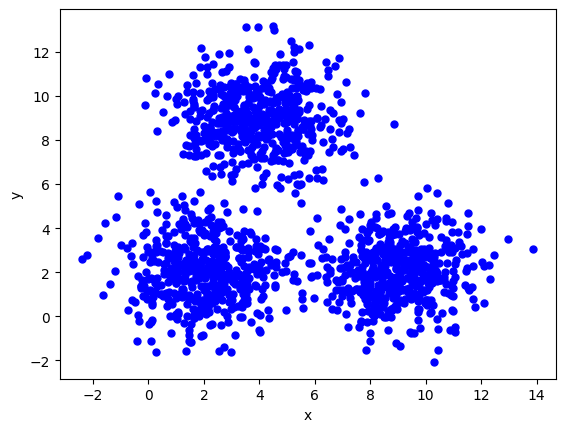

In [ ]:
# Vẽ đồ thị để hiển thị dữ liệu ban đầu trước khi phân cụm
plt.xlabel("x")  # Đặt nhãn cho trục x
plt.ylabel("y")  # Đặt nhãn cho trục y

# Vẽ tất cả các điểm dữ liệu
# X[:, 0]: tọa độ x của tất cả các điểm
# X[:, 1]: tọa độ y của tất cả các điểm
# "bo": màu xanh (blue) với marker hình tròn (o)
# markersize=5: kích thước của marker
plt.plot(X[:, 0], X[:, 1], "bo", markersize=5)

plt.plot()  # Gọi hàm plot (có thể không cần thiết)
plt.show()  # Hiển thị đồ thị

In [ ]:
# Hàm khởi tạo các tâm cụm ban đầu (centroids) một cách ngẫu nhiên
def kmeans_init_centers(X, n_cluster):
  # X: mảng dữ liệu đầu vào (mỗi hàng là một điểm dữ liệu)
  # n_cluster: số lượng cụm cần tạo

  # np.random.choice: chọn ngẫu nhiên n_cluster chỉ số từ 0 đến X.shape[0]-1
  # X.shape[0]: số lượng điểm dữ liệu
  # replace=False: không cho phép chọn trùng (mỗi điểm chỉ được chọn một lần)
  # Kết quả: trả về n_cluster điểm dữ liệu ngẫu nhiên làm tâm cụm ban đầu
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [ ]:
# Hàm gán nhãn (label) cho mỗi điểm dữ liệu dựa trên khoảng cách đến các tâm cụm
def kmeans_predict_labels(X, centers):
  # X: mảng dữ liệu đầu vào
  # centers: mảng chứa tọa độ của các tâm cụm

  # cdist: tính khoảng cách giữa mỗi điểm trong X và mỗi tâm cụm trong centers
  # Kết quả D là ma trận có kích thước (số điểm dữ liệu x số cụm)
  # D[i, j] = khoảng cách từ điểm thứ i đến tâm cụm thứ j
  D = cdist(X, centers)

  # np.argmin(D, axis=1): tìm chỉ số của tâm cụm gần nhất cho mỗi điểm
  # axis=1: tìm min theo từng hàng (mỗi hàng là một điểm dữ liệu)
  # Kết quả: mảng labels, labels[i] = chỉ số cụm mà điểm thứ i thuộc về
  return np.argmin(D, axis=1)

In [ ]:
# Hàm cập nhật vị trí của các tâm cụm dựa trên các điểm đã được gán nhãn
def kmeans_update_center(X, labels, n_cluster):
  # X: mảng dữ liệu đầu vào
  # labels: mảng nhãn, labels[i] cho biết điểm thứ i thuộc cụm nào
  # n_cluster: số lượng cụm

  # Khởi tạo mảng centers với kích thước (n_cluster x số chiều dữ liệu)
  # X.shape[1]: số chiều của dữ liệu (trong trường hợp này là 2: x và y)
  centers = np.zeros((n_cluster, X.shape[1]))

  # Duyệt qua từng cụm
  for k in range(n_cluster):
    # Lọc ra tất cả các điểm thuộc cụm k
    # labels == k: tạo mảng boolean, True nếu điểm thuộc cụm k
    # X[labels == k, :]: lấy tất cả các điểm có labels == k
    Xk = X[labels == k, :]

    # Tính trung bình của tất cả các điểm trong cụm k
    # np.mean(Xk, axis=0): tính trung bình theo từng cột (theo từng chiều)
    # Kết quả là tọa độ trung tâm mới của cụm k
    centers[k, :] = np.mean(Xk, axis=0)

  # Trả về mảng các tâm cụm mới
  return centers

In [ ]:
# Hàm kiểm tra xem thuật toán đã hội tụ (converged) chưa
def kmeans_has_converged(centers, new_centers):
  # centers: tọa độ các tâm cụm ở lần lặp trước
  # new_centers: tọa độ các tâm cụm ở lần lặp hiện tại

  # Chuyển đổi mỗi tâm cụm thành tuple để có thể so sánh và thêm vào set
  # [tuple(a) for a in centers]: tạo danh sách các tuple từ mảng centers
  # set(...): chuyển thành set để so sánh (không quan tâm thứ tự)

  # So sánh hai set: nếu bằng nhau nghĩa là các tâm cụm không thay đổi
  # => thuật toán đã hội tụ, có thể dừng lại
  return (set([tuple(a) for a in centers]) ==
          set([tuple(a) for a in new_centers]))

In [ ]:
# Hàm vẽ đồ thị để hiển thị kết quả phân cụm
def kmeans_visualize(X, centers, labels, n_cluster, title):
  # X: mảng dữ liệu
  # centers: tọa độ các tâm cụm
  # labels: nhãn của từng điểm dữ liệu
  # n_cluster: số lượng cụm
  # title: tiêu đề của đồ thị

  plt.xlabel("x")  # Đặt nhãn trục x
  plt.ylabel("y")  # Đặt nhãn trục y
  plt.title(title)  # Đặt tiêu đề cho đồ thị

  # Danh sách màu để vẽ các cụm khác nhau
  # 'b'=blue, 'g'=green, 'r'=red, 'c'=cyan, 'm'=magenta, 'y'=yellow, 'k'=black, 'w'=white
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

  # Vẽ từng cụm
  for i in range(n_cluster):
    # Lọc ra tất cả các điểm thuộc cụm i
    data = X[labels == i]

    # Vẽ các điểm dữ liệu của cụm i
    # plt_colors[i] + '^': màu tương ứng với cụm i, marker hình tam giác (^)
    # markersize=4: kích thước marker nhỏ
    # label: nhãn để hiển thị trong legend
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4, label='cluster_' + str(i))

    # Vẽ tâm cụm i
    # centers[i][0], centers[i][1]: tọa độ x và y của tâm cụm
    # plt_colors[i + 4]: màu khác với màu của điểm dữ liệu (dịch 4 vị trí trong danh sách)
    # 'o': marker hình tròn
    # markersize=10: kích thước lớn hơn để dễ nhận biết
    plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o',
    markersize =10, label='center_' + str(i))

  plt.legend()  # Hiển thị chú thích (legend) để phân biệt các cụm
  plt.show()  # Hiển thị đồ thị

In [ ]:
# Hàm chính thực hiện thuật toán K-means
def kmeans(init_centers, init_labels, X, n_cluster):
  # init_centers: tọa độ các tâm cụm ban đầu
  # init_labels: nhãn ban đầu của các điểm (thường là tất cả bằng 0)
  # X: mảng dữ liệu đầu vào
  # n_cluster: số lượng cụm

  # Khởi tạo các biến
  centers = init_centers  # Lưu tọa độ các tâm cụm hiện tại
  labels = init_labels  # Lưu nhãn của các điểm dữ liệu
  times = 0  # Đếm số lần lặp

  # Vòng lặp chính của thuật toán K-means
  while True:
    # Bước 1: Gán nhãn cho mỗi điểm dữ liệu
    # Mỗi điểm được gán vào cụm có tâm cụm gần nhất
    labels = kmeans_predict_labels(X, centers)

    # Hiển thị kết quả sau khi gán nhãn
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time =' + str(times + 1))

    # Bước 2: Cập nhật vị trí các tâm cụm
    # Tính trung bình của tất cả các điểm trong mỗi cụm để làm tâm cụm mới
    new_centers = kmeans_update_center(X, labels, n_cluster)

    # Bước 3: Kiểm tra điều kiện dừng
    # Nếu các tâm cụm không thay đổi => thuật toán đã hội tụ => dừng lại
    if kmeans_has_converged(centers, new_centers):
      break  # Thoát khỏi vòng lặp

    # Cập nhật tâm cụm cho lần lặp tiếp theo
    centers = new_centers

    # Hiển thị kết quả sau khi cập nhật tâm cụm
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time =' + str(times + 1))

    # Tăng số lần lặp
    times += 1

  # Trả về kết quả: tâm cụm cuối cùng, nhãn của các điểm, và số lần lặp
  return (centers, labels, times)

[[0.93855527 0.01428675]
 [3.34692069 3.39926508]
 [2.40960105 0.69470049]]


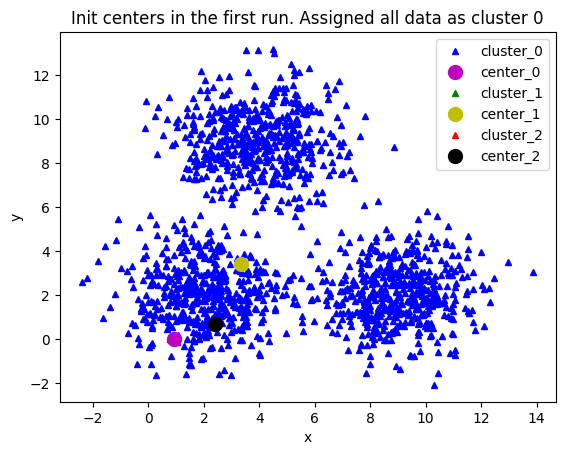

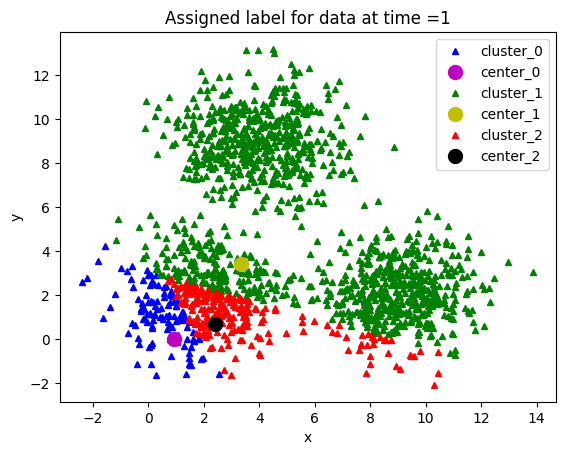

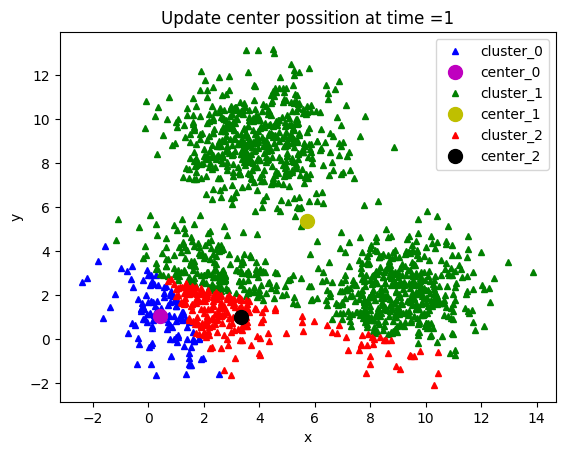

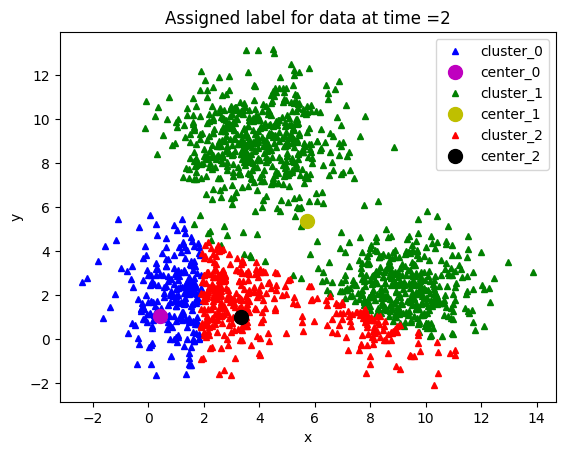

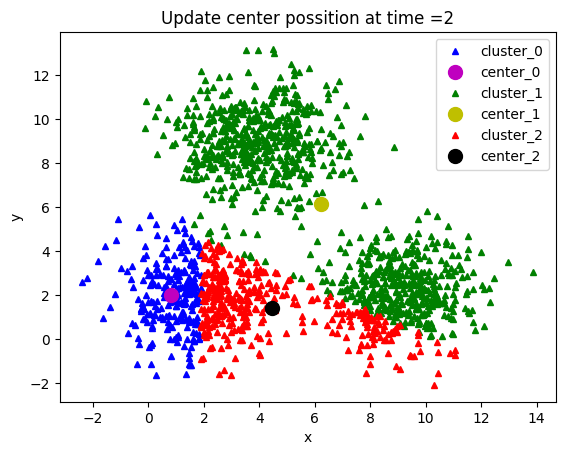

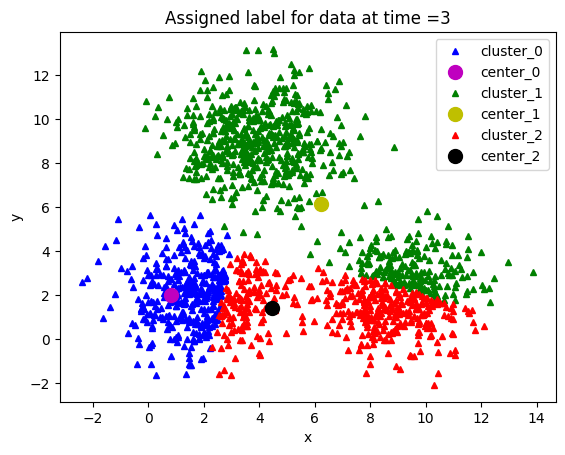

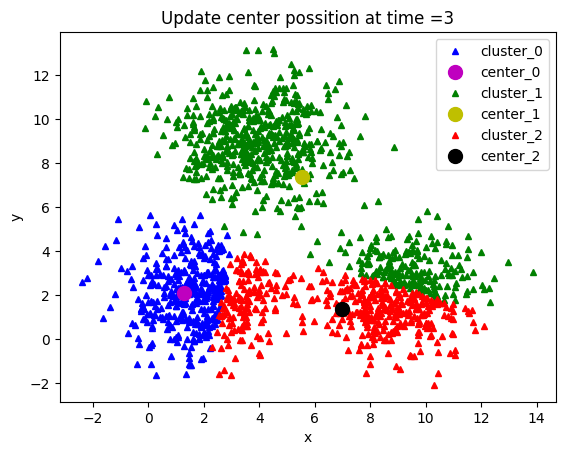

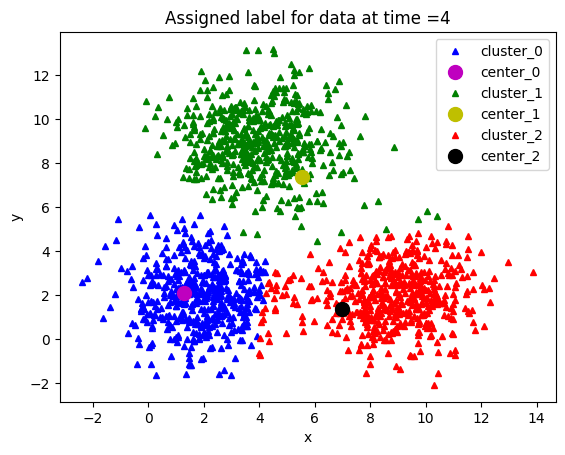

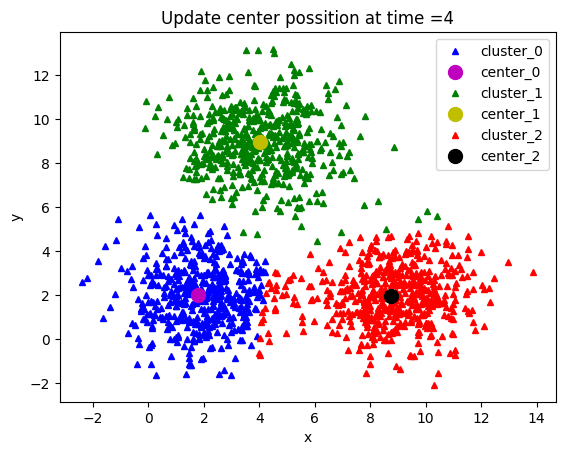

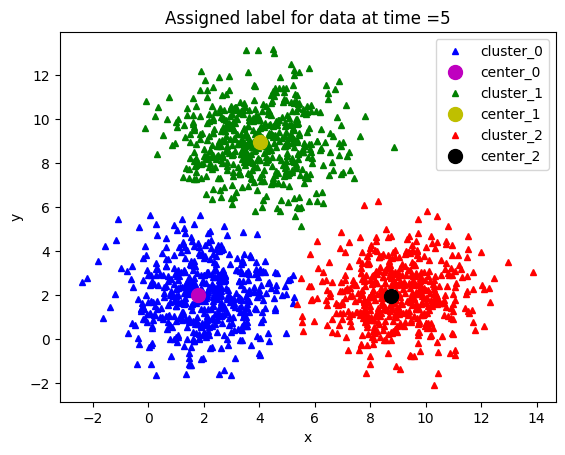

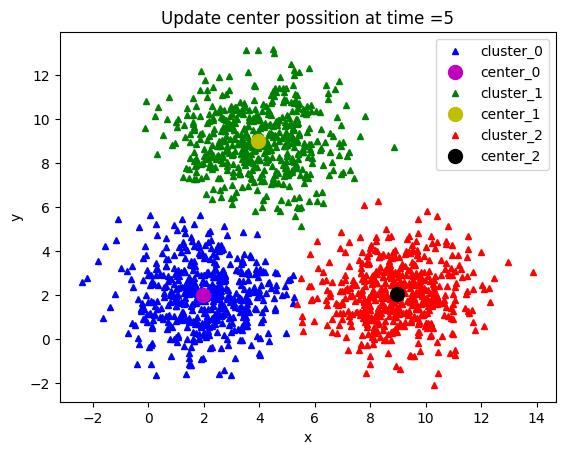

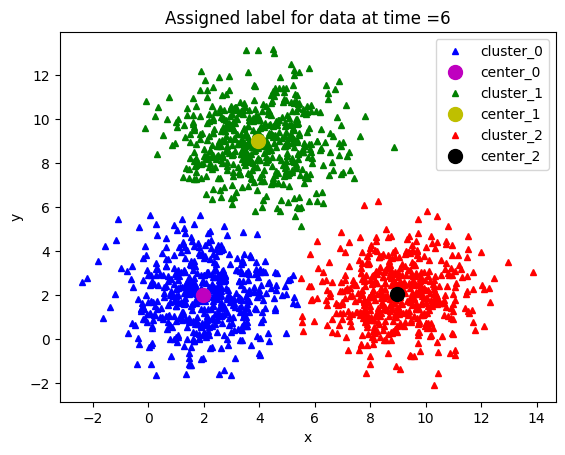

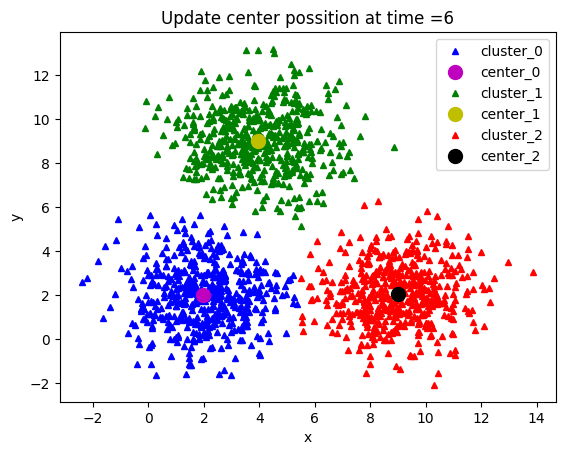

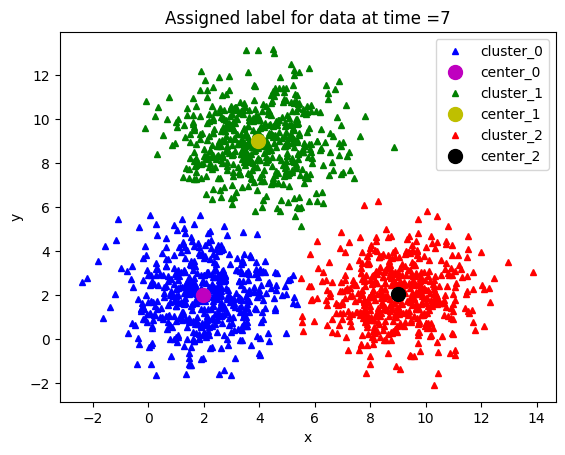

Done! Kmeans has converged after 6 times
[[1.96990358 1.99809413]
 [3.95026957 9.02007431]
 [8.98904672 2.06347741]]


In [ ]:
# Khởi tạo các tâm cụm ban đầu bằng cách chọn ngẫu nhiên n_cluster điểm từ dữ liệu
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm

# Khởi tạo nhãn ban đầu: tất cả các điểm được gán nhãn 0 (chưa phân cụm)
# np.zeros(X.shape[0]): tạo mảng có X.shape[0] phần tử, tất cả bằng 0
init_labels = np.zeros(X.shape[0])

# Hiển thị trạng thái ban đầu: các tâm cụm khởi tạo và tất cả điểm được gán vào cụm 0
kmeans_visualize(X, init_centers, init_labels, n_cluster,
"Init centers in the first run. Assigned all data as cluster 0")

# Chạy thuật toán K-means
# Hàm sẽ lặp lại cho đến khi các tâm cụm không thay đổi nữa
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

# In ra kết quả
print("Done! Kmeans has converged after", times ,"times")  # Số lần lặp cần thiết
print(centers)  # Tọa độ cuối cùng của các tâm cụm sau khi hội tụ